In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Grid:
def grid(a,b,c,d,n,m):
    h = (b - a) / n
    k = (d - c) / m
    x=np.linspace(a,b,n+1)
    y=np.linspace(c,d,m+1)
    
    return x, y, h, k

#Boundary
def boundary(x,y, gxc, gxd, gya, gyb, n,m):
    w=np.zeros((n+1,m+1))
    for i in range(n+1):
        w[i,0] = gxc(x[i]) #left boundary
        w[i,m] = gxd(x[i]) #right boundary
    for j in range(m+1):
        w[0,j] = gya(y[j]) #lower boundary
        w[n,j] = gyb(y[j]) #upper boundary
    return w


In [2]:
def boundary_conditions(x, y):
    return x, 0, np.e*x, 2*np.e**y
#print(np.array_str(w, precision=2, suppress_small=True))


In [3]:
w=np.ones((5,5))
w[4,4] = 5
w[1,4] = 4
print(w)
for i in range(0,5): #step 10
    print(w[i,i])

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 4.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 5.]]
1.0
1.0
1.0
1.0
5.0


In [4]:
#following textbook

def poissonDiff(x,y,h,k,n,m, f, TOL, N):
    lam = (h**2)/k**2
    mu = 2*(1+lam)
    l = 1
    w = np.zeros((n+1, m+1))
    w[:,0], w[0,:], w[:,m], w[n,:] = boundary_conditions(x, y)
    #w= np.transpose(w)
    print(np.array_str(w, precision=2, suppress_small=True))
   
    while l <= N: #Gauss-Seidel Iterations
        z = (-h**2 * f(x[0],y[m-1]) + w[0,m-1] + lam * w[0,m] + lam* w[0,m-2] + w[1,m-1])/mu
        norm = np.abs(z-w[0,m-1])
        w[0,m-1] = z
        #print(np.array_str(w, precision=2, suppress_small=True))
        for i in range(1,n-2):
            z = (-h**2 * f(x[i],y[m-1]) + lam*w[i,m] + w[i-1,m-1] + w[i+1,m-1] + lam * w[i,m-2])/mu
            if np.abs(w[i,m-1] - z) > norm:
                norm = np.abs(w[i,m-1] - z)
           #     print(f"step 1 + {norm}")
            w[i,m-1] = z
        z = (-h**2 * f(x[i-1],y[m-1]) + w[n,m-1]+ lam*w[n-1,m] + w[n-2,m-1] + lam * w[n-1,m-2])/mu #step 9
        if np.abs(w[n-1,m-1] - z) > norm:
            norm = np.abs(w[n-1,m-1] - z)
        #    print(f"step 1.5 + {norm}")
        w[n-1,m-1] = z
        for j in range(m-2,0,-1): #step 10
            z = (-h**2*f(x[0], y[j]) + w[0,j] + lam*(w[0,j+1] + w[0,j-1]) + w[1,j] )/mu
            if np.abs(w[0,j] - z) > norm:
                norm = np.abs(w[0,j] - z)
            w[0,j] = z
      #      print(np.array_str(w, precision=2, suppress_small=True))
      #      print(f"step 2 + {norm}")
            for i in range(1,n-1): #step 12
                z = (-h**2*f(x[i], y[j]) + w[i-1,j] + lam*w[i,j+1]  + w[i+1,j] + lam*w[i,j-1] )/mu
                if np.abs(w[i,j] - z) > norm:
                    norm = np.abs(w[i,j] - z)
                    #print(f"step 3 + {norm}")
                w[i,j] = z
         #       print(np.array_str(w, precision=2, suppress_small=True))
            z = (-h**2 * f(x[n-1], y[j]) + w[n,j] + w[n-2,j] + lam*w[n-1,j+1]+lam*w[n-1,j-1])/mu #step 13
            if np.abs(w[n-1,j] - z) > norm:
                norm = np.abs(w[n-1,j]-z)
            w[n-1,j] = z
       #     print(np.array_str(w, precision=2, suppress_small=True))
       #     print(f"step 4 + {norm}")
        z = (-h**2*f(x[0],y[0])+w[0,0] + lam*w[0,0]+lam*w[0,1]+w[1,0])/mu #step 14
        if np.abs(w[1,1] - z) > norm:
            norm = np.abs(w[1,1]-z)
        #    print(f"step 5 + {norm}")
        w[1,1] = z
        #print(np.array_str(w, precision=2, suppress_small=True))
        for i in range(2,n-1): #step 15
            z = (-h**2 * f(x[i],y[0]) + lam* w[i,0]+w[i-1,0]+ lam*w[i,1]+w[i+1,0])/mu
            if np.abs(w[i,1]-z) > norm:
                norm = np.abs(w[i, 1 ]- z)
            w[i,1] = z
         #   print(f"step 6 + {norm}")
        z = (-h**2 * f(x[n-1], y[0])+w[n,0]+lam*w[n-1,0]+w[n-2,0] + lam * w[n-1,1])/mu #step 16
        if np.abs(w[n-1,0]-z) > norm:
            norm = np.abs(w[n-1,0] - z)
        #    print(f"step 7 + {norm}")
        w[n-1,1] = z
        if norm <= TOL:
            print("norm under TOL")
            print(np.array_str(w, precision=2, suppress_small=True))
            return w
        l = l+1
    print("max iteration exceeded")
    print(np.array_str(w, precision=2, suppress_small=True))
    return w
    


In [5]:
#chatgpt fix
def poissonDiffGPT(x, y, h, k, n, m, w, f, gxc, gxd, gya, gyb, TOL, N):
    lam = h**2 / k**2
    mu = 2 * (1 + lam)
    l = 1

    while l <= N:  # Gauss-Seidel Iterations
        norm = 0
        for i in range(1, n - 1):
            for j in range(1, m - 1):
                z = (-h**2 * f(x[i], y[j]) + w[i-1, j] + lam * (w[i+1, j] + w[i, j+1] + w[i, j-1])) / mu
                norm = max(norm, abs(w[i, j] - z))
                w[i, j] = z

        # Boundary Conditions
        for i in range(n):
            w[i, 0] = gax(x[0])
            w[i, m-1] = gbx(x[m-1])
        for j in range(m):
            w[0, j] = gcy(y[0])
            w[n-1, j] = gdy(y[n-1])

        if norm <= TOL:
            for i in range(1,n-1):
                for j in range(1,m-1):
                    return x,y,w

        l += 1

    return x, y, w

In [6]:
# Define the constant value of 'f'
f_value = 4

def poissonDiffGPT2(x, y, h, k, n, m, w, gxc, gxd, gya, gyb, TOL, N):
    lam = h**2 / k**2
    mu = 2 * (1 + lam)
    l = 1

    while l <= N:  # Gauss-Seidel Iterations
        norm = 0
        for i in range(1, n - 1):
            for j in range(1, m - 1):
                z = (-h**2 * f_value + w[i-1, j] + lam * (w[i+1, j] + w[i, j+1] + w[i, j-1])) / mu
                norm = max(norm, abs(w[i, j] - z))
                w[i, j] = z

        # Boundary Conditions
        for i in range(n):
            w[i, 0] = gax(x[0])
            w[i, m-1] = gbx(x[n-1])
        for j in range(m):
            w[0, j] = gcy(y[0])
            w[n-1, j] = gdy(y[m-1])

        if norm <= TOL:
            break

        l += 1

    return x, y, w

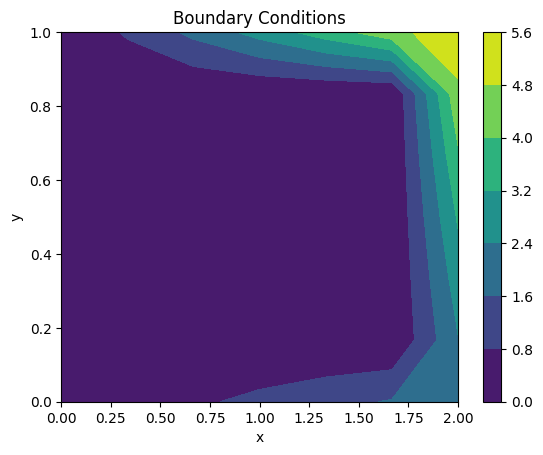

In [7]:
a,b,c,d=0,2,0,1
n,m=6,6
TOL=0.0000000001
N= 1000

x,y,h,k = grid(a,b,c,d,n,m)

def f(x,y):
    return x*np.e**y

# Boundary functions
def gxc(x):
    return x

def gxd(x):
    return np.e*x

def gya(y):
    return 0

def gyb(y):
    return 2*np.e**y

w = boundary(x, y, gxc, gxd, gya, gyb, n, m)
#print(np.array_str(w, precision=2, suppress_small=True))
w = np.transpose(w)


# Plotting
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, w, cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Boundary Conditions')
plt.show()

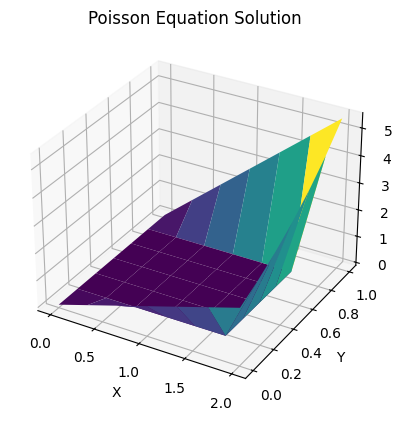

In [8]:
def plot_solution(x, y, w):
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, w, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Solution')
    plt.title('Poisson Equation Solution')
    plt.show()


plot_solution(x, y, w)

In [9]:
w=poissonDiff(x,y,h,k, n,m, f, TOL,N)



[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.33 0.   0.   0.   0.   0.   0.91]
 [0.67 0.   0.   0.   0.   0.   1.81]
 [1.   0.   0.   0.   0.   0.   2.72]
 [1.33 0.   0.   0.   0.   0.   3.62]
 [1.67 0.   0.   0.   0.   0.   4.53]
 [2.   2.36 2.79 3.3  3.9  4.6  5.44]]
max iteration exceeded
[[0.   0.09 0.19 0.27 0.28 0.21 0.  ]
 [0.33 0.07 0.31 0.48 0.63 0.77 0.91]
 [0.67 0.67 0.74 0.88 1.09 1.39 1.81]
 [1.   0.99 1.03 1.12 1.31 1.72 2.72]
 [1.33 1.3  1.26 1.15 0.83 0.   3.62]
 [1.67 1.7  1.97 2.27 2.68 3.33 4.53]
 [2.   2.36 2.79 3.3  3.9  4.6  5.44]]


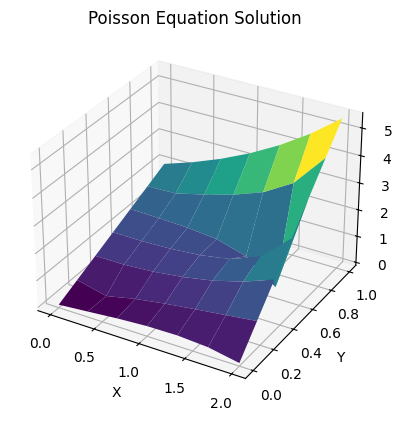

[[0.   0.09 0.19 0.27 0.28 0.21 0.  ]
 [0.33 0.07 0.31 0.48 0.63 0.77 0.91]
 [0.67 0.67 0.74 0.88 1.09 1.39 1.81]
 [1.   0.99 1.03 1.12 1.31 1.72 2.72]
 [1.33 1.3  1.26 1.15 0.83 0.   3.62]
 [1.67 1.7  1.97 2.27 2.68 3.33 4.53]
 [2.   2.36 2.79 3.3  3.9  4.6  5.44]]


In [10]:
def plot_solution(x, y, w):
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, w, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Solution')
    plt.title('Poisson Equation Solution')
    plt.show()


plot_solution(x, y, w)
print(np.array_str(w, precision=2, suppress_small=True))


[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.33 0.39 0.47 0.55 0.65 0.77 0.91]
 [0.67 0.79 0.93 1.1  1.3  1.53 1.81]
 [1.   1.18 1.4  1.65 1.95 2.3  2.72]
 [1.33 1.58 1.86 2.2  2.6  3.07 3.62]
 [1.67 1.97 2.33 2.75 3.25 3.83 4.53]
 [2.   2.36 2.79 3.3  3.9  4.6  5.44]]


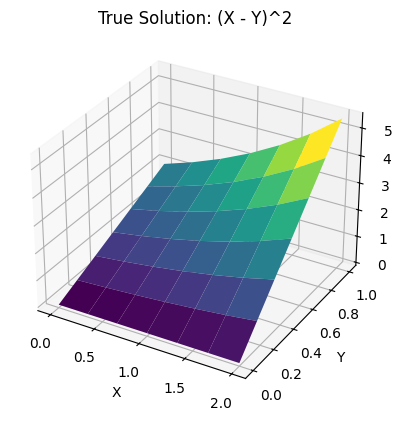

In [11]:
def true_solution(x, y):
    return x*np.e**y

# Define the grid


# Evaluate the true solution on the grid

Z_true = true_solution(X, Y)
Z_true = np.transpose(Z_true)
print(np.array_str(Z_true, precision=2, suppress_small=True))
# Plot the true solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_true, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_zlabel('(X - Y)^2')
plt.title('True Solution: (X - Y)^2')
plt.show()